In [12]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitute and longitude combinations.
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
from citipy import citipy

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

650

In [18]:
import requests
from config import weather_api_key
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bambous virieux
Processing Record 2 of Set 13 | mataura
Processing Record 3 of Set 13 | doctor pedro p. pena
City not found. Skipping...
Processing Record 4 of Set 13 | bagotville
Processing Record 5 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 13 | avarua
Processing Record 7 of Set 13 | viedma
Processing Record 8 of Set 13 | bluff
Processing Record 9 of Set 13 | norsup
Processing Record 10 of Set 13 | hermanus
Processing Record 11 of Set 13 | hilo
Processing Record 12 of Set 13 | vanavara
Processing Record 13 of Set 13 | vila
Processing Record 14 of Set 13 | nanortalik
Processing Record 15 of Set 13 | lexington
Processing Record 16 of Set 13 | burnie
Processing Record 17 of Set 13 | flin flon
Processing Record 18 of Set 13 | bintulu
Processing Record 19 of Set 13 | westport
Processing Record 20 of Set 13 | busselton
Processing Record 21 of Set 13 | neuquen
Pr

Processing Record 32 of Set 16 | leh
Processing Record 33 of Set 16 | mount gambier
Processing Record 34 of Set 16 | dwarka
Processing Record 35 of Set 16 | saleaula
City not found. Skipping...
Processing Record 36 of Set 16 | arraial do cabo
Processing Record 37 of Set 16 | cherskiy
Processing Record 38 of Set 16 | homer
Processing Record 39 of Set 16 | sitka
Processing Record 40 of Set 16 | cidreira
Processing Record 41 of Set 16 | thompson
Processing Record 42 of Set 16 | bengkulu
Processing Record 43 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 16 | grindavik
Processing Record 45 of Set 16 | namibe
Processing Record 46 of Set 16 | vallenar
Processing Record 47 of Set 16 | ascension
Processing Record 48 of Set 16 | baruun-urt
Processing Record 49 of Set 16 | nicoya
Processing Record 50 of Set 16 | pankrushikha
Processing Record 1 of Set 17 | santa maria
Processing Record 2 of Set 17 | leningradskiy
Processing Record 3 of Set 17 | constitucion
Processi

Processing Record 21 of Set 20 | pervomayskoye
Processing Record 22 of Set 20 | kupang
Processing Record 23 of Set 20 | cuyo
Processing Record 24 of Set 20 | yumen
Processing Record 25 of Set 20 | beyneu
Processing Record 26 of Set 20 | vaitupu
City not found. Skipping...
Processing Record 27 of Set 20 | nogliki
Processing Record 28 of Set 20 | kahului
Processing Record 29 of Set 20 | jishou
Processing Record 30 of Set 20 | poronaysk
Processing Record 31 of Set 20 | beni suef
Processing Record 32 of Set 20 | port elizabeth
Processing Record 33 of Set 20 | ilhabela
Processing Record 34 of Set 20 | el asintal
Processing Record 35 of Set 20 | evensk
Processing Record 36 of Set 20 | hudson bay
Processing Record 37 of Set 20 | samana
Processing Record 38 of Set 20 | qui nhon
Processing Record 39 of Set 20 | sadon
Processing Record 40 of Set 20 | praya
Processing Record 41 of Set 20 | pauini
Processing Record 42 of Set 20 | ust-kamchatsk
City not found. Skipping...
Processing Record 43 of Se

Processing Record 10 of Set 24 | glendive
Processing Record 11 of Set 24 | novo aripuana
Processing Record 12 of Set 24 | solovetskiy
City not found. Skipping...
Processing Record 13 of Set 24 | labelle
Processing Record 14 of Set 24 | tabiauea
City not found. Skipping...
Processing Record 15 of Set 24 | helong
Processing Record 16 of Set 24 | tanabe
Processing Record 17 of Set 24 | longkou
Processing Record 18 of Set 24 | karoi
Processing Record 19 of Set 24 | sungaipenuh
Processing Record 20 of Set 24 | balaguer
Processing Record 21 of Set 24 | bairiki
Processing Record 22 of Set 24 | nishihara
Processing Record 23 of Set 24 | bajah
Processing Record 24 of Set 24 | touros
Processing Record 25 of Set 24 | brae
Processing Record 26 of Set 24 | campbell river
Processing Record 27 of Set 24 | coventry
Processing Record 28 of Set 24 | pomabamba
Processing Record 29 of Set 24 | srandakan
Processing Record 30 of Set 24 | port hawkesbury
Processing Record 31 of Set 24 | strezhevoy
Processing

In [20]:
print(len(city_data))

597


In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.34,57.76,73.00,88,20,5.82,MU,2020-10-12 19:26:52
1,Mataura,-46.19,168.86,40.78,93,43,0.98,NZ,2020-10-12 19:26:52
2,Bagotville,-28.98,153.42,57.99,100,1,2.24,AU,2020-10-12 19:26:52
3,Avarua,-21.21,-159.78,71.60,88,76,3.36,CK,2020-10-12 19:26:52
4,Viedma,-40.81,-63.00,84.99,19,0,4.00,AR,2020-10-12 19:26:52
5,Bluff,-46.60,168.33,45.41,79,79,7.18,NZ,2020-10-12 19:26:52
6,Norsup,-16.07,167.38,75.20,94,20,13.02,VU,2020-10-12 19:26:52
7,Hermanus,-34.42,19.23,59.00,87,0,5.01,ZA,2020-10-12 19:26:53
8,Hilo,19.73,-155.09,84.20,62,20,4.70,US,2020-10-12 19:26:53
9,Vanavara,60.34,102.28,19.17,94,73,3.98,RU,2020-10-12 19:26:53


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2020-10-12 19:26:52,-20.34,57.76,73.00,88,20,5.82
1,Mataura,NZ,2020-10-12 19:26:52,-46.19,168.86,40.78,93,43,0.98
2,Bagotville,AU,2020-10-12 19:26:52,-28.98,153.42,57.99,100,1,2.24
3,Avarua,CK,2020-10-12 19:26:52,-21.21,-159.78,71.60,88,76,3.36
4,Viedma,AR,2020-10-12 19:26:52,-40.81,-63.00,84.99,19,0,4.00


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

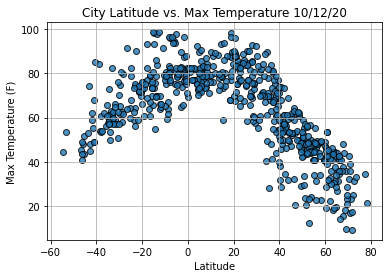

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

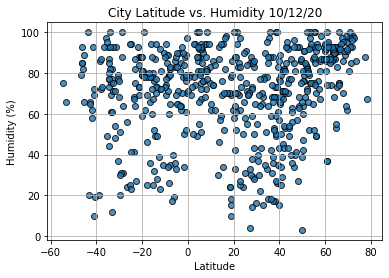

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

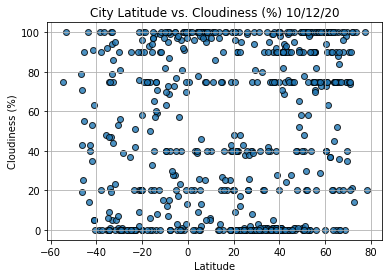

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

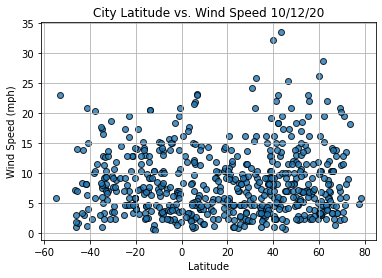

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()